All datasets are subclasses of torch.utils.data.Dataset they have __getitem__ and __len__
Then they can all be passed to a torch.utils.data.DataLoader which can load samples in parallel with torch.multiprocessing wokers


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# note that we don't train on the test data :)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

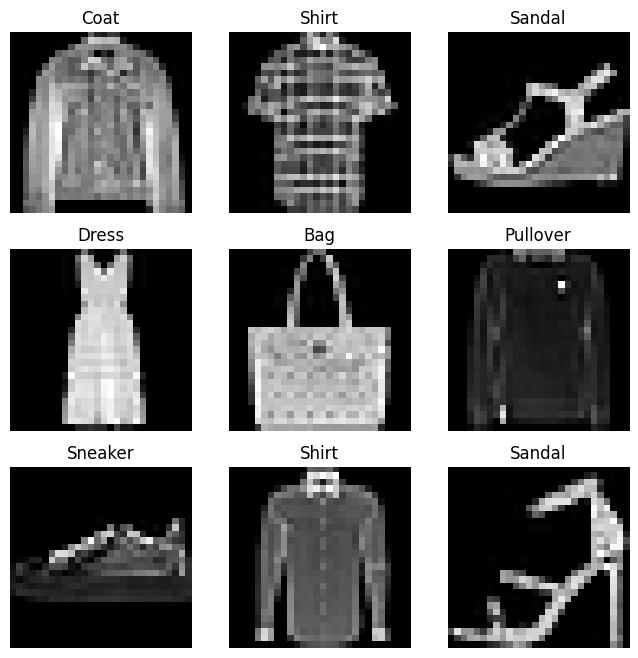

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Creating a custom Dataset
implement init, len, and getitem

In [6]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __intit__(self, annotation_labels, image_dir, transform=None, target_transform=None):
        self.image_labels = pd.read_csv(annotation_labels)
        self.image_dir = image_dir
        self.transform = transform
        self.target_transform = target_transform
        
        
    def __len__(self):
        return len(self.image_labels)
    
    # getitem returns both an instance of an image and its labels in this case
    # this is also where the transform function is called if applicable
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

DataLoaders

Datasets retrieve datas features and labels one sample at a time. When training a model, we typically want to pass samples in minibatches, reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


TypeError: DataLoader.__init__() got an unexpected keyword argument 'batch_siz'